# Titanic Exploratory Data Analysis (EDA)
Data Science and Data Analyst Mini Bootcamp (Dibimbing: Digital Skill Fair 38)

## 1. Latar Belakang dan Tujuan Investigasi

**Latar Belakang**
* Dataset Titanic adalah salah satu dataset paling terkenal yang digunakan untuk pembelajaran data science dan machine learning. Dataset ini berisi informasi penumpang kapal Titanic yang tenggelam pada tahun 1912. Tujuan dari analisis ini adalah untuk melakukan eksplorasi awal terhadap data penumpang, dengan fokus pada kolom Survived, Name, Sex, dan Age.

**Tujuan Investigasi**
* Melakukan eksplorasi awal terhadap sampel data (melalui head, tail, sample, dan info dataset).
* Menyusun statistik deskriptif untuk mendapatkan gambaran umum data.
* Mendeteksi keberadaan data duplikat serta menangani jika ada.
* Mendeteksi missing value, menghitung persentasenya, dan mencari strategi penanganannya.

## 2. Import Library dan Load Dataset

### Library

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Baca file dari URL GitHub
import io
import requests

### Load Dataset File dari Google Drive

In [182]:
from google.colab import drive
drive.mount('/content/drive/')

csv_data = '/content/drive/MyDrive/Courses/DibimbingDSF38/EDA/Assignment/titanic.csv'
df_csv = pd.read_csv(csv_data)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load Dataset File dari GitHub

In [183]:
url = 'https://raw.githubusercontent.com/meinalisaa/DibimbingDSF38/master/Materi/EDA/Assignment/titanic.csv'

response = requests.get(url)
response.raise_for_status()
csv_data = io.StringIO(response.text)
df = pd.read_csv(csv_data)

## 3. Eksplorasi Awal Dataset

### Head, Tail, Sample

In [184]:
# Menampilkan 5 baris pertama
print("Lima baris pertama:")
print(df.head())

# Menampilkan 10 baris pertama
print("\nTiga baris pertama:")
print(df.head(3))

Lima baris pertama:
   survived                                             name     sex      age
0         1                    Allen, Miss. Elisabeth Walton  female  29.0000
1         1                   Allison, Master. Hudson Trevor    male   0.9167
2         0                     Allison, Miss. Helen Loraine  female   2.0000
3         0             Allison, Mr. Hudson Joshua Creighton    male  30.0000
4         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000

Tiga baris pertama:
   survived                            name     sex      age
0         1   Allen, Miss. Elisabeth Walton  female  29.0000
1         1  Allison, Master. Hudson Trevor    male   0.9167
2         0    Allison, Miss. Helen Loraine  female   2.0000


In [185]:
    # Menampilkan 5 baris terakhir
    print("Lima baris terakhir:")
    print(df.tail())

    # Menampilkan 3 baris terakhir
    print("\nTiga baris terakhir:")
    print(df.tail(3))

Lima baris terakhir:
     survived                                     name     sex   age
495         1  Mallet, Mrs. Albert (Antoinette Magnin)  female  24.0
496         0        Mangiavacchi, Mr. Serafino Emilio    male   NaN
497         0               Matthews, Mr. William John    male  30.0
498         0                Maybery, Mr. Frank Hubert    male  40.0
499         0                McCrae, Mr. Arthur Gordon    male  32.0

Tiga baris terakhir:
     survived                        name   sex   age
497         0  Matthews, Mr. William John  male  30.0
498         0   Maybery, Mr. Frank Hubert  male  40.0
499         0   McCrae, Mr. Arthur Gordon  male  32.0


In [186]:
# Mengambil 1 baris acak
print("Satu baris acak:")
print(df.sample())

# Mengambil 5 baris acak
print("\nLima baris acak:")
print(df.sample(5))

# Mengambil 1% baris acak
print("\n1% baris acak:")
print(df.sample(frac=0.01))

Satu baris acak:
     survived                        name     sex   age
169         0  Isham, Miss. Ann Elizabeth  female  50.0

Lima baris acak:
     survived                                         name     sex   age
98          1  Douglas, Mrs. Walter Donald (Mahala Dutton)  female  48.0
280         1              Stengel, Mr. Charles Emil Henry    male  54.0
292         1                     Taylor, Mr. Elmer Zebley    male  48.0
344         1                      Bentham, Miss. Lilian W  female  19.0
131         1      Gibson, Mrs. Leonard (Pauline C Boeson)  female  45.0

1% baris acak:
     survived                                            name     sex   age
184         0                               Lewy, Mr. Ervin G    male   NaN
411         0                Frost, Mr. Anthony Wood "Archie"    male   NaN
331         0                        Bailey, Mr. Percy Andrew    male  18.0
300         0                       Van der hoef, Mr. Wyckoff    male  61.0
65          1  Cham

### Informasi Dataset


In [187]:
# Ukuran dataset
print(f"Number of rows and columns: {df.shape}")

# Daftar kolom
print("List of columns:")
print(df.columns.tolist())

# Informasi kolom
print("Dataset Information:")
df.info()

Number of rows and columns: (500, 4)
List of columns:
['survived', 'name', 'sex', 'age']
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


### Observasi Awal

Dataset memiliki 500 baris dan 4 kolom

Kolom yang tersedia: Survived, Name, Sex, dan Age

Tipe data:

Survived: int64 (binary – 0 = tidak selamat, 1 = selamat)

Name: object (nama lengkap penumpang)

Sex: object (kategori jenis kelamin)

Age: float64 (nilai umur, bisa jadi ada yang kosong)

Kemungkinan ada missing value di kolom Age (dilihat dari info())

## 4. Statistical Summary

### Statistik Deskriptif Kolom Numerik

In [188]:
# Statistik untuk kolom numerik
df.describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


### Statistik Deskriptif Kolom Kategori (Object)

In [189]:
# Statistik untuk kolom non-numerik
df.describe(include='object')

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


### Distribusi Unik & Frekuensi

In [190]:
# Nilai unik kolom 'Survived'
print("Distribusi Survived:")
print(df['survived'].value_counts())

# Distribusi kolom 'Sex'
print("\nDistribusi Jenis Kelamin:")
print(df['sex'].value_counts())

Distribusi Survived:
survived
1    270
0    230
Name: count, dtype: int64

Distribusi Jenis Kelamin:
sex
male      288
female    212
Name: count, dtype: int64


### Visualisasi Data

<ipython-input-191-758440d1b7c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


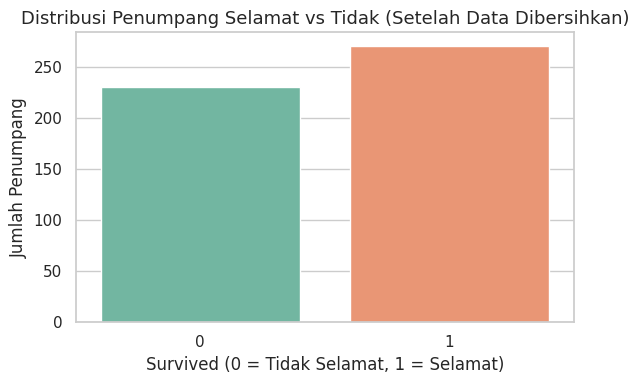

<ipython-input-191-758440d1b7c6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


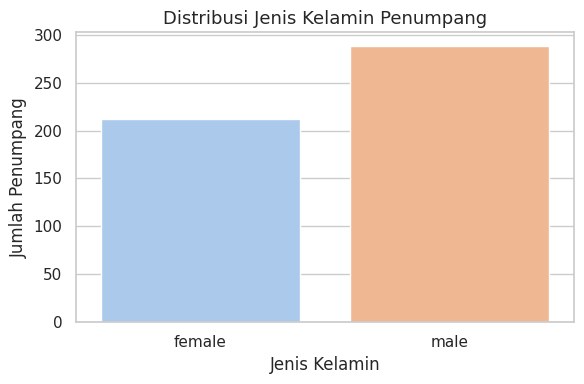

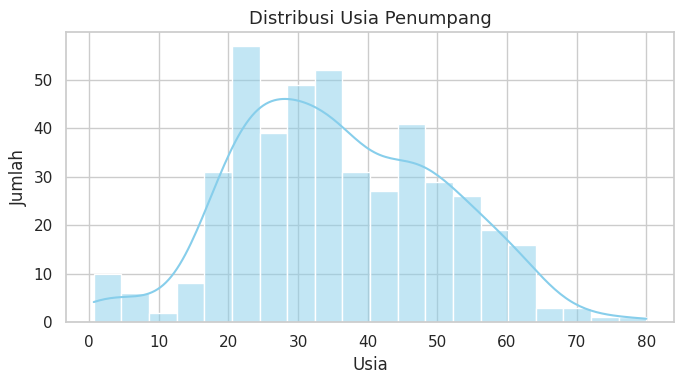

In [191]:
# Visualisasi komposisi survived setelah bersih
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df, palette='Set2')
plt.title("Distribusi Penumpang Selamat vs Tidak (Setelah Data Dibersihkan)", fontsize=13)
plt.xlabel("Survived (0 = Tidak Selamat, 1 = Selamat)")
plt.ylabel("Jumlah Penumpang")
plt.tight_layout()
plt.show()

# Visualisasi distribusi jenis kelamin
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title("Distribusi Jenis Kelamin Penumpang", fontsize=13)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.tight_layout()
plt.show()

# Visualisasi distribusi umur
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Usia Penumpang", fontsize=13)
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

### Observasi: Statistik Deskriptif

**Jumlah Data:** Dataset terdiri dari **500 baris** dan **4 kolom** yaitu: `survived`, `name`, `sex`, dan `age`.

#### Distribusi Survived
- Selamat (`1`) : 270 orang  
- Tidak selamat (`0`) : 230 orang  
- **Persentase yang selamat:** 54%

#### Komposisi Jenis Kelamin
- Laki-laki : 288 orang  
- Perempuan : 212 orang  
- **Mayoritas penumpang adalah laki-laki**

#### Statistik Umur Penumpang
- Rata-rata umur : 29.23 tahun  
- Umur termuda : 0.42 tahun  
- Umur tertua : 80.0 tahun

#### Kolom `name`
- Kolom `name` berisi nama lengkap penumpang, yang dapat dianalisis lebih lanjut.
- Terdapat pola tertentu seperti gelar:
  - **Mr.** → kemungkinan penumpang pria dewasa  
  - **Mrs.** → kemungkinan wanita menikah  
  - **Miss.** → kemungkinan wanita muda/lajang
- Analisis terhadap gelar ini bisa menjadi insight tambahan dalam investigasi data.


## 5. Pemeriksaan Duplikat

### Cek dan Hapus Duplikat

In [192]:
# Cek jumlah baris duplikat (seluruh baris sama persis)
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

duplicates_all = df.duplicated(keep=False)
# print(f"Jumlah baris yang termasuk dalam duplikat: {duplicates_all.sum()}")
df[duplicates_all]

# Tampilkan data yang duplikat (jika ada)
# df[duplicates]

Number of duplicate rows: 1


,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [193]:
# Hapus duplikat dan reset index
df = df.drop_duplicates().reset_index(drop=True)
print("Duplikat berhasil dihapus.")

Duplikat berhasil dihapus.


### Observasi: Pemeriksaan Duplikat



- Pemeriksaan dilakukan untuk melihat apakah terdapat baris yang **identik (duplikat)** di dataset.
- Hasil menunjukkan bahwa:
  - **Jumlah baris duplikat:** 1 baris
- Duplikat berpotensi menyebabkan analisis yang bias dan perlu dihapus.
- Telah dilakukan penghapusan duplikat menggunakan fungsi `drop_duplicates()`, dan index di-reset agar data tetap rapi.

## 6. Pemeriksaan dan Penanganan Missing Value

### Cek, Visualisasi, dan Handle Missing Value

In [194]:
# Cek jumlah missing value di tiap kolom
missing_count = df.isnull().sum()
# missing_count
print("Jumlah Missing Value per Kolom:\n", missing_count)

# Persentase missing value
missing_percent = (missing_count / len(df)) * 100
print("\nPersentase Missing Value per Kolom:\n", missing_percent)

,0
survived,0
name,0
sex,0
age,49


<ipython-input-195-294643c50d9f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


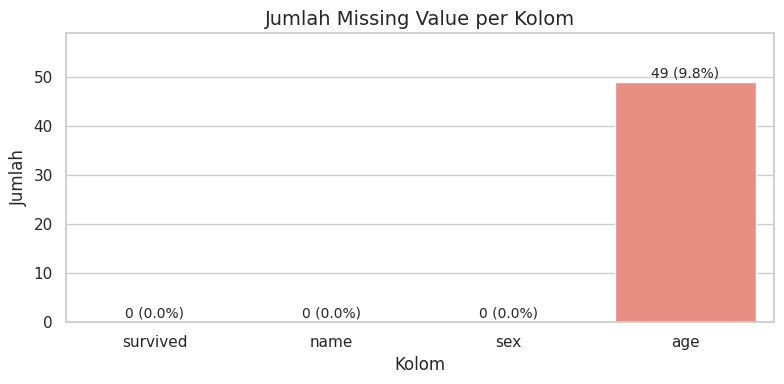

In [195]:
# Gabungkan jadi satu DataFrame
missing_data = pd.DataFrame({
    'Jumlah Missing': missing_count,
    'Persentase (%)': missing_percent
})

# Plot
plt.figure(figsize=(8, 4))
colors = ['salmon' if val > 0 else 'lightgray' for val in missing_data['Jumlah Missing']]

sns.barplot(
    x=missing_data.index,
    y=missing_data['Jumlah Missing'],
    palette=colors
)

plt.title("Jumlah Missing Value per Kolom", fontsize=14)
plt.ylabel("Jumlah")
plt.xlabel("Kolom")
plt.ylim(0, max(missing_data['Jumlah Missing']) + 10)

# Tampilkan jumlah & persentase di atas bar
for i, (jumlah, persen) in enumerate(zip(missing_data['Jumlah Missing'], missing_data['Persentase (%)'])):
    plt.text(i, jumlah + 1, f"{jumlah} ({persen:.1f}%)", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [196]:
# Isi Missing Value dengan Median
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print("Missing value pada kolom 'age' telah diisi dengan median:", median_age)

Missing value pada kolom 'age' telah diisi dengan median: 35.0


### Observasi: Pemeriksaan dan Penanganan Missing Value

- Dilakukan pemeriksaan nilai yang hilang (missing value) di seluruh kolom dataset.
- Hasil menunjukkan:
  - Kolom `age` memiliki sejumlah nilai kosong (missing).
  - Kolom `survived`, `name`, dan `sex` **tidak memiliki** missing value.

- **Penanganan yang dilakukan:**
  - Missing value pada kolom `age` diisi menggunakan **nilai median** dari kolom tersebut.
  - Alasan penggunaan median adalah untuk menghindari pengaruh outlier yang bisa menyebabkan bias jika menggunakan mean.

- Dengan ini, dataset sudah **bersih dari missing value** dan siap digunakan untuk analisis lebih lanjut.


## 7. Kesimpulan Investigasi Data Titanic

#### Ringkasan Temuan:
- Dataset terdiri dari 500 baris dan 4 kolom: `survived`, `name`, `sex`, dan `age`.
- **Kolom `age`** memiliki 49 missing value (9.8%), sudah diatasi dengan metode imputasi menggunakan **median**.
- Tidak ditemukan **duplikasi data**, jadi tidak diperlukan penghapusan baris.
- Rata-rata usia penumpang: sekitar 29 tahun, dengan usia termuda 0.75 dan tertua 80 tahun.
- Komposisi penumpang: **288 laki-laki** dan **212 perempuan**.
- Sebanyak **270 penumpang selamat**, dan **230 tidak selamat**.

#### Saran untuk Langkah Selanjutnya:
1. **Ekstraksi Fitur Baru**:
   - Dari kolom `name`, bisa diambil gelar seperti `Mr.`, `Mrs.`, `Miss.` untuk melihat pengaruh status sosial terhadap keselamatan.
2. **Analisis Korelasi**:
   - Telusuri hubungan antar fitur, seperti antara `sex`, `age`, dan `survived`.
3. **Visualisasi Lanjutan**:
   - Gunakan plot multivariat seperti boxplot, violinplot, heatmap korelasi, dll.
4. **Praproses untuk Model Machine Learning**:
   - Ubah variabel kategori (`sex`) menjadi numerik, dan lanjut ke prediksi keselamatan (`survived`) dengan model klasifikasi.

> Investigasi ini merupakan langkah awal yang penting sebelum analisis lanjutan. Dataset yang sudah bersih akan membantu menghasilkan insight yang lebih akurat dan bisa dilanjutkan ke eksplorasi mendalam maupun pembuatan model prediktif.


# Soal

## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?